In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.optimize as optimize

### Defining the fundamental parameters

In [16]:
NUM_TRADING_DAYS = 252

NUM_PORTFOLIOS = 100000

stocks = ['INFY.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'TCS.NS', 'HINDUNILVR.NS', 'LT.NS', 'ITC.NS']

start_date = '2015-01-01'
end_date = '2022-09-30'

### Downloading and storing data

In [3]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']
    
stock_prices = pd.DataFrame(stock_data)
stock_prices

,INFY.NS,RELIANCE.NS,HDFCBANK.NS,TCS.NS,HINDUNILVR.NS,LT.NS,ITC.NS
Date,,,,,,,
2015-01-01,407.770935,417.988953,451.475281,1097.644043,667.497375,872.795105,195.391052
2015-01-02,415.784271,416.882629,457.758667,1112.261597,665.297241,891.203857,196.003036
2015-01-05,412.211304,412.316284,453.893799,1095.358521,669.125549,903.602356,196.774734
2015-01-06,403.599060,393.603485,446.828003,1054.976562,681.798645,873.462891,191.718979
2015-01-07,405.530151,402.171326,448.132080,1042.515015,705.736755,871.372314,188.153381
...,...,...,...,...,...,...,...
2022-09-23,1365.449951,2439.500000,1446.150024,2974.352295,2682.050049,1856.849976,346.399994
2022-09-26,1380.250000,2377.350098,1426.650024,2986.670166,2660.550049,1851.449951,332.600006
2022-09-27,1393.550049,2396.250000,1413.849976,3009.660889,2679.250000,1841.199951,334.850006


### Showing price charts for the stocks

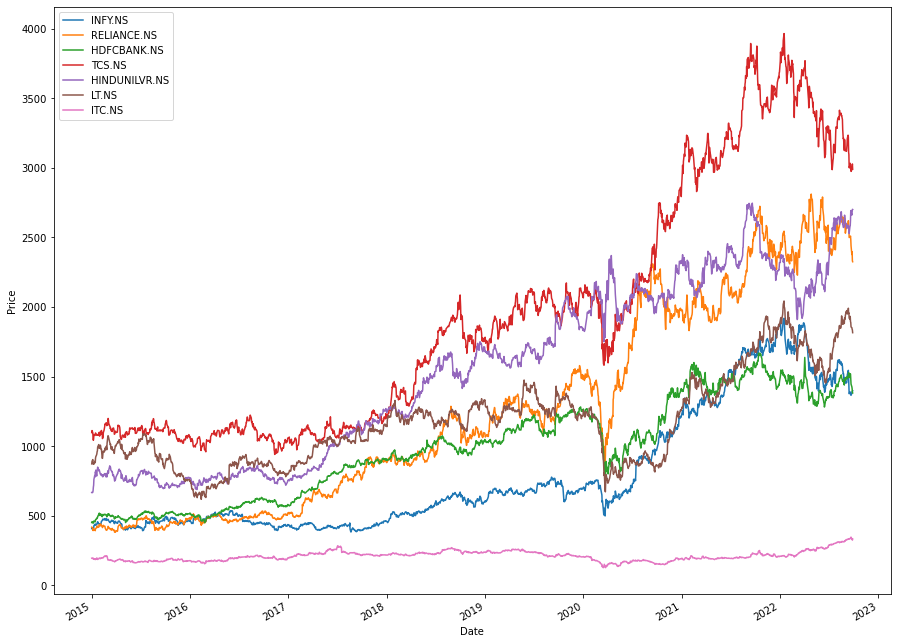

In [4]:
stock_prices.plot(figsize = (15, 12))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Calculating logarithmic daily returns

In [5]:
log_returns = np.log(stock_prices / stock_prices.shift(1))[1:]
log_returns

,INFY.NS,RELIANCE.NS,HDFCBANK.NS,TCS.NS,HINDUNILVR.NS,LT.NS,ITC.NS
Date,,,,,,,
2015-01-02,0.019461,-0.002650,0.013821,0.013229,-0.003302,0.020872,0.003127
2015-01-05,-0.008630,-0.011014,-0.008479,-0.015314,0.005738,0.013816,0.003929
2015-01-06,-0.021114,-0.046447,-0.015690,-0.037563,0.018763,-0.033924,-0.026029
2015-01-07,0.004773,0.021534,0.002914,-0.011882,0.034508,-0.002396,-0.018773
2015-01-08,0.005029,-0.014443,0.020788,0.010737,0.018716,0.006344,0.024724
...,...,...,...,...,...,...,...
2022-09-23,-0.001829,-0.018922,-0.027183,-0.008465,-0.003982,-0.016742,0.003905
2022-09-26,0.010781,-0.025807,-0.013576,0.004133,-0.008049,-0.002912,-0.040654
2022-09-27,0.009590,0.007919,-0.009013,0.007668,0.007004,-0.005552,0.006742


### Statistics of the stocks

In [6]:
print('*** NET RETURNS ON THE STOCKS ***')
print(log_returns.mean() * NUM_TRADING_DAYS)
print()
print('*** VOLATILITY OF THE STOCKS ***')
print(np.sqrt(log_returns.var() * NUM_TRADING_DAYS))

*** NET RETURNS ON THE STOCKS ***
INFY.NS          0.162450
RELIANCE.NS      0.226187
HDFCBANK.NS      0.147486
TCS.NS           0.132058
HINDUNILVR.NS    0.184212
LT.NS            0.096532
ITC.NS           0.070287
dtype: float64

*** VOLATILITY OF THE STOCKS ***
INFY.NS          0.274695
RELIANCE.NS      0.295545
HDFCBANK.NS      0.234880
TCS.NS           0.245770
HINDUNILVR.NS    0.234869
LT.NS            0.279226
ITC.NS           0.269837
dtype: float64


### Simulating portfolios

In [17]:
portfolio_means = []
portfolio_risks = []
portfolio_weights = []

for _ in range(NUM_PORTFOLIOS):
    w = np.random.random(len(stocks))
    w /= np.sum(w)
    portfolio_weights.append(w)
    portfolio_means.append(np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS)
    portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w))))

weights = np.array(portfolio_weights)
returns = np.array(portfolio_means)
risks = np.array(portfolio_risks)

portfolios = pd.DataFrame({'Return': returns, 'Risk': risks, 'Sharpe Ratio': returns/risks})
portfolios

,Return,Risk,Sharpe Ratio
0,0.151710,0.174194,0.870924
1,0.135692,0.169236,0.801790
2,0.160652,0.172351,0.932124
3,0.154152,0.165103,0.933672
4,0.118376,0.179516,0.659416
...,...,...,...
99995,0.145409,0.176210,0.825204
99996,0.140321,0.164871,0.851095
99997,0.148755,0.164820,0.902529
99998,0.146176,0.176118,0.829989


### Plotting the portfolios

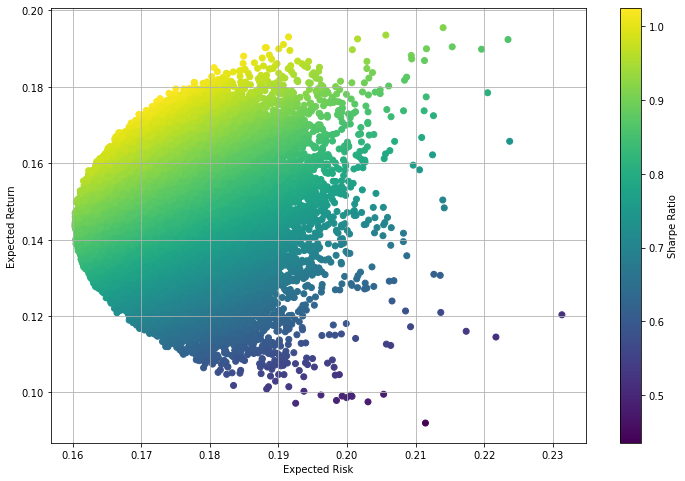

In [18]:
plt.figure(figsize = (12, 8))
plt.scatter(risks, returns, c = returns / risks, marker = 'o')
plt.grid(True)
plt.xlabel('Expected Risk')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')
plt.show()

### Finding optimal portfolio (maximum Sharpe Ratio)

In [19]:
sharpe_ratios = returns / risks
index = 0

for i in range(len(sharpe_ratios)):
    if sharpe_ratios[i] == np.amax(sharpe_ratios):
        index = i
        
print("The optimal portfolio has a Sharpe Ratio: ", sharpe_ratios[index].round(5))
print()

print("Expected Return: ", returns[index].round(5))
print("Expected Volatility: ", risks[index].round(5))
print()

print("Weights to be allotted to the stocks:")

for i in range(len(stocks)):
    print(stocks[i],':', weights[index][i].round(5))


The optimal portfolio has a Sharpe Ratio:  1.02508

Expected Return:  0.17943
Expected Volatility:  0.17504

Weights to be allotted to the stocks:
INFY.NS : 0.13247
RELIANCE.NS : 0.24391
HDFCBANK.NS : 0.08551
TCS.NS : 0.09036
HINDUNILVR.NS : 0.40997
LT.NS : 0.00063
ITC.NS : 0.03717


### Plotting Optimal Portfolio

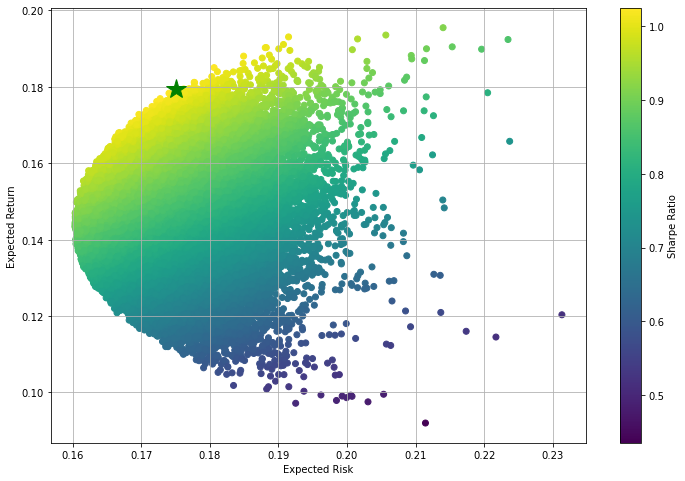

In [20]:
plt.figure(figsize = (12, 8))
plt.scatter(risks, returns, c = returns / risks, marker = 'o')
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(risks[index], returns[index], 'g*', markersize = 20.0)

### Minimum Variance Portfolio

In [21]:
index1 = 0

for i in range(len(risks)):
    if risks[i] == np.amin(risks):
        index1 = i
        
print("The minimum variance portfolio has a Sharpe Ratio: ", sharpe_ratios[index1].round(5))
print()

print("Expected Return: ", returns[index1].round(5))
print("Expected Volatility: ", risks[index1].round(5))
print()

print("Weights to be allotted to the stocks:")

for i in range(len(stocks)):
    print(stocks[i],':', weights[index1][i].round(5))


The minimum variance portfolio has a Sharpe Ratio:  0.89548

Expected Return:  0.14355
Expected Volatility:  0.16031

Weights to be allotted to the stocks:
INFY.NS : 0.06962
RELIANCE.NS : 0.07182
HDFCBANK.NS : 0.19432
TCS.NS : 0.2146
HINDUNILVR.NS : 0.22936
LT.NS : 0.04822
ITC.NS : 0.17206


### Plotting Minimum Variance Portfolio

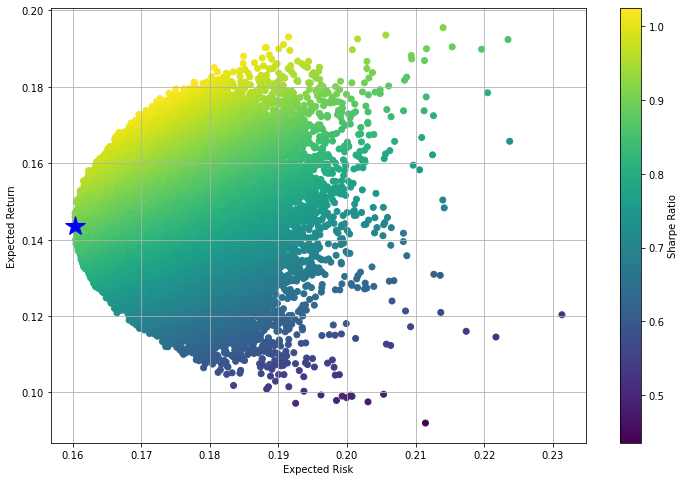

In [22]:
plt.figure(figsize = (12, 8))
plt.scatter(risks, returns, c = returns / risks, marker = 'o')
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(risks[index1], returns[index1], 'b*', markersize = 20.0)